In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import numpy as np
import pandas as pd

In [10]:
import seaborn as sns

In [17]:
import matplotlib.pyplot as plt

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## load data and explore

In [3]:
df = pd.read_csv('gapminder.csv')

In [4]:
df.shape
df.columns
df.dtypes
df.head()

(139, 10)

Index(['index', 'population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality'],
      dtype='object')

index                int64
population         float64
fertility          float64
HIV                float64
CO2                float64
BMI_male           float64
GDP                float64
BMI_female         float64
life               float64
child_mortality    float64
dtype: object

,index,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            139 non-null    int64  
 1   population       139 non-null    float64
 2   fertility        139 non-null    float64
 3   HIV              139 non-null    float64
 4   CO2              139 non-null    float64
 5   BMI_male         139 non-null    float64
 6   GDP              139 non-null    float64
 7   BMI_female       139 non-null    float64
 8   life             139 non-null    float64
 9   child_mortality  139 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 11.0 KB


,index,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,139.000000,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,69.000000,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,40.269923,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,0.000000,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,34.500000,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,69.000000,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,103.500000,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,138.000000,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


<AxesSubplot:>

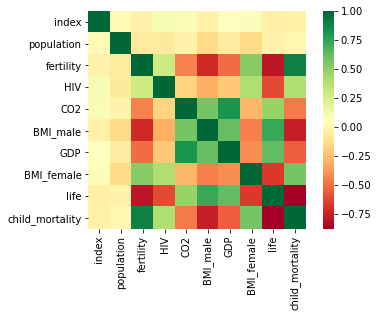

In [11]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

## prepare data; 1 feature `fertility`

In [5]:
# Create arrays for features and target variable
X = df['fertility'].values
y = df['life'].values
X.shape
y.shape

(139,)

(139,)

In [6]:
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


In [7]:
# Reshape X and y
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape
y.shape

(139, 1)

(139, 1)

In [8]:
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


## fit and predict for regression; 1 feature `fertility`

In [13]:
X_fertility = df['fertility'].values
X_fertility = X.reshape(-1,1)

In [14]:
reg = LinearRegression()
reg.fit(X_fertility, y)
reg.score(X_fertility, y)

LinearRegression()

0.6192442167740035

In [15]:
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)
y_pred = reg.predict(prediction_space)

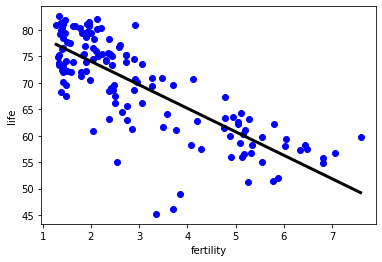

In [19]:
plt.scatter(X_fertility, y, color='blue');
plt.plot(prediction_space, y_pred, color='black', linewidth=3);
plt.ylabel('life');
plt.xlabel('fertility');
plt.show();

## fit and predict for regression; all features

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

LinearRegression()

In [24]:
R2 = reg_all.score(X_test, y_test)
R2

0.7298987360907498

In [25]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MSE , RMSE

(17.589870144335883, 4.194027914110239)

## 5-fold cross-validation

In [27]:
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)

In [28]:
cv_results
cv_results.mean()

array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

0.6168819644425119

## k-fold cross-validation comparison

In [29]:
reg = LinearRegression()

In [35]:
%timeit cvscores_3 = cross_val_score(reg, X, y, cv=3)

4.79 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
# %timeit cvscores_10 = cross_val_score(reg, X, y, cv=10)
cvscores_10 = cross_val_score(reg, X, y, cv=10)

In [44]:
cvscores_3
cvscores_3.mean()

array([0.75397745, 0.55557583, 0.57886144])

0.6294715754653507

In [46]:
cvscores_10
cvscores_10.mean()

array([0.54471791, 0.75586083, 0.83921958, 0.6900756 , 0.33991801,
       0.53042913, 0.44784016, 0.66619475, 0.4439451 , 0.62573667])

0.5883937741571185

## lasso regression: all features (L1 regularization)

In [54]:
df.drop(['index', 'life'], axis=1).columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

In [55]:
X = df.drop(['index', 'life'], axis=1).values
y = df['life'].values
y = y.reshape(-1,1)
X.shape, y.shape

((139, 8), (139, 1))

In [56]:
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X, y)
lasso_coef = lasso.coef_

Lasso(alpha=0.4, normalize=True)

In [57]:
df_columns = df.drop(['index', 'life'], axis=1).columns
df_columns
lasso_coef

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

array([-0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.07087587])

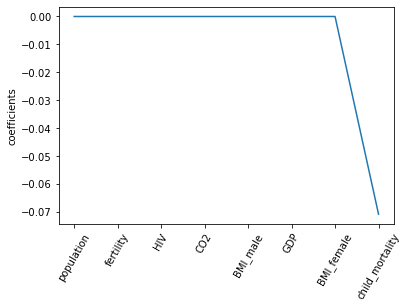

In [58]:
plt.plot(range(len(df_columns)), lasso_coef);
plt.xticks(range(len(df_columns)), df_columns, rotation=60);
plt.ylabel('coefficients');
plt.show();

## ridge regression: all features (L2 regularization)

In [60]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [61]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []
ridge = Ridge(normalize=True)

In [62]:
for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    ridge_scores.append(ridge_cv_scores.mean())
    ridge_scores_std.append(ridge_cv_scores.std())

In [64]:
print(ridge_scores)
print(ridge_scores_std)

[0.8436316582436036, 0.8436355351778289, 0.8436402092854227, 0.8436458433479143, 0.8436526328707327, 0.8436608124264007, 0.8436706631192082, 0.8436825213188557, 0.8436967888042881, 0.8437139444359396, 0.8437345574252708, 0.8437593021811731, 0.8437889745644698, 0.8438245091483598, 0.8438669967297452, 0.8439177008199177, 0.8439780711095043, 0.8440497508916582, 0.8441345740799443, 0.8442345457311603, 0.8443517978825922, 0.844488510135766, 0.8446467820250568, 0.8448284423112012, 0.8450347797916713, 0.845266182274267, 0.8455216766054077, 0.8457983747116333, 0.8460908495223494, 0.8463904897277501, 0.8466849098778532, 0.8469575144528327, 0.8471873191329766, 0.8473491053988813, 0.8474139143663144, 0.847349770399816, 0.8471223781325167, 0.8466953895441179, 0.8460297360480513, 0.8450815121919136, 0.8437980170652979, 0.8421118101831631, 0.8399329806647575, 0.837140181581422, 0.8335712496481472, 0.8290143505888636, 0.8232005861958187, 0.8157990094054697, 0.8064152330834272, 0.7945954438680314]
[0.

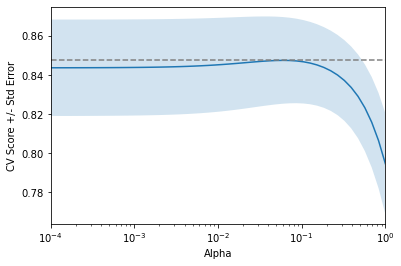

In [65]:
display_plot(ridge_scores, ridge_scores_std)